In [ ]:
import pandas as pd
import numpy as np
import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Layer, Dense, Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data = pd.read_csv('/content/Thyroid.csv')

In [ ]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


In [ ]:
data.shape

(9172, 31)

In [ ]:
data.isnull().sum()

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
referral_source           0
target                    0
patient_id                0
dtype: int64

In [ ]:
data.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured','referral_source','patient_id'],axis=1,inplace=True)

In [ ]:
diagnoses = {'A': 'hyperthyroid conditions',
             'B': 'hyperthyroid condition',
             'c': 'hyperthyroid condition',
             'd': 'hyperthyroid condition',
             'E':'hyperthyroid condition',
             'F':'hyperthyroid condition',
             'G':'hyperthyroid condition',
             'H':'hyperthyroid ciondition',
             'I':'binding protein',
             'J':'binding protein',
             'K':'general health',
             'L':'replacement therapy',
             'M':'replacement therapy',
             'N':'replacement therapy',
             'O':'antithyroid treatmemt',
             'P':'antithyroid treatment',
             'Q':'antithyroid treatment',
             'R':'miscellaneous',
             'S':'miscellaneous',
             'T':'miscellaneous'}
data['target'] = data['target'].map(diagnoses)

In [ ]:
data.dropna(subset=['target'],inplace=True)

In [ ]:
data['target'].value_counts()

hyperthyroid condition     614
general health             436
binding protein            376
replacement therapy        336
miscellaneous              281
hyperthyroid conditions    147
antithyroid treatment       19
antithyroid treatmemt       14
Name: target, dtype: int64

In [ ]:
data[data.age>100]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target


In [ ]:
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [ ]:
x

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
4,32,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,36.0
18,63,F,t,f,f,t,f,f,f,f,...,f,f,f,f,68.000000,NaN,48.0,1.02,47.0,NaN
32,41,M,f,f,f,f,f,f,f,f,...,f,f,f,f,0.050000,1.6,39.0,1.00,39.0,NaN
33,71,F,t,f,f,f,f,f,f,f,...,f,f,f,f,0.050000,NaN,126.0,1.38,91.0,NaN
39,55,F,t,f,f,f,f,f,f,t,...,f,f,f,f,9.599999,2.4,136.0,1.48,92.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,64,M,f,f,f,f,f,f,f,f,...,f,f,f,f,0.810000,NaN,31.0,0.55,56.0,NaN
9157,60,M,f,f,t,f,f,f,f,f,...,f,f,f,f,0.180000,NaN,28.0,0.87,32.0,NaN
9158,64,M,f,f,f,f,f,f,f,t,...,f,f,f,f,NaN,NaN,44.0,0.53,83.0,NaN
9162,36,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,84.0,1.26,67.0,NaN


In [ ]:
x['sex'].unique()

array(['F', 'M', nan], dtype=object)

In [ ]:
x['sex'].replace(np.nan, 'F', inplace=True)

In [ ]:
x['sex'].value_counts()

F    1687
M     536
Name: sex, dtype: int64

In [ ]:
x['age']=x['age'].astype('float')
x['TSH']=x['TSH'].astype('float')
x['T3']=x['T3'].astype('float')
x['TT4']=x['TT4'].astype('float')
x['T4U']=x['T4U'].astype('float')
x['FTI']=x['FTI'].astype('float')
x['TBG']=x['TBG'].astype('float')

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2223 entries, 4 to 9169
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  2223 non-null   float64
 1   sex                  2223 non-null   object 
 2   on_thyroxine         2223 non-null   object 
 3   query_on_thyroxine   2223 non-null   object 
 4   on_antithyroid_meds  2223 non-null   object 
 5   sick                 2223 non-null   object 
 6   pregnant             2223 non-null   object 
 7   thyroid_surgery      2223 non-null   object 
 8   I131_treatment       2223 non-null   object 
 9   query_hypothyroid    2223 non-null   object 
 10  query_hyperthyroid   2223 non-null   object 
 11  lithium              2223 non-null   object 
 12  goitre               2223 non-null   object 
 13  tumor                2223 non-null   object 
 14  hypopituitary        2223 non-null   object 
 15  psych                2223 non-null   o

In [ ]:
#Encoding the categorical data
#Encoding the independent(output) variable
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
#categorical data


ordinal_encoder = OrdinalEncoder(dtype = 'int64')
x.iloc[:, 1:16] = ordinal_encoder.fit_transform(x.iloc[:, 1:16])
#ordinal_encoder.fit_transform(x[['sex']])

<ipython-input-138-0a337bba829c>:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x.iloc[:, 1:16] = ordinal_encoder.fit_transform(x.iloc[:, 1:16])


In [ ]:
x

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
4,32.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,36.0
18,63.0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,68.000000,NaN,48.0,1.02,47.0,NaN
32,41.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.050000,1.6,39.0,1.00,39.0,NaN
33,71.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.050000,NaN,126.0,1.38,91.0,NaN
39,55.0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,9.599999,2.4,136.0,1.48,92.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,64.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.810000,NaN,31.0,0.55,56.0,NaN
9157,60.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0.180000,NaN,28.0,0.87,32.0,NaN
9158,64.0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,NaN,NaN,44.0,0.53,83.0,NaN
9162,36.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,NaN,NaN,84.0,1.26,67.0,NaN


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [ ]:
from imblearn.over_sampling import SMOTE
y_train.value_counts()

hyperthyroid condition     492
general health             353
binding protein            295
replacement therapy        278
miscellaneous              222
hyperthyroid conditions    109
antithyroid treatment       17
antithyroid treatmemt       12
Name: target, dtype: int64

In [ ]:
x.replace(np.nan, 0, inplace=True)                  

In [ ]:
x.replace('F', 0, inplace=True)
x.replace('M', 1, inplace=True)
x.replace('f', 0, inplace=True)
x.replace('t', 1, inplace=True) 

In [ ]:
x

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
4,32.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.000000,0.0,0.0,0.00,0.0,36.0
18,63.0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,68.000000,0.0,48.0,1.02,47.0,0.0
32,41.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.050000,1.6,39.0,1.00,39.0,0.0
33,71.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.050000,0.0,126.0,1.38,91.0,0.0
39,55.0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,9.599999,2.4,136.0,1.48,92.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,64.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.810000,0.0,31.0,0.55,56.0,0.0
9157,60.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0.180000,0.0,28.0,0.87,32.0,0.0
9158,64.0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0.000000,0.0,44.0,0.53,83.0,0.0
9162,36.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.000000,0.0,84.0,1.26,67.0,0.0


In [ ]:
label_encoder = LabelEncoder()
y_dt= label_encoder.fit_transform(y)

In [ ]:
y=pd.DataFrame(y_dt, columns=['target'])

In [ ]:
y

,target
0,6
1,4
2,6
3,2
4,7
...,...
2218,3
2219,3
2220,2
2221,2


In [ ]:
x_test.replace('F', 0, inplace=True)
x_test.replace('M', 1, inplace=True)
x_test.replace('f', 0, inplace=True)
x_test.replace('t', 1, inplace=True)
x_test.replace(np.nan, '0', inplace=True)

In [ ]:
x_test

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
6639,59.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0.09,0,172.0,0.96,180.0,0
426,72.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.1,0,180.0,0.9,200.0,0
5366,33.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.015,5.0,244.0,0.67,362.0,0
2412,74.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.6,0.7,82.0,0.88,93.0,0
213,33.0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,53.0,1.0,32.0,0.78,41.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6281,56.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.05,3.8,200.0,0.76,264.0,0
5582,35.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.005,3.1,239.0,1.0,239.0,0
5104,51.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.04,3.7,169.0,1.14,148.0,0
8522,84.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,2.8,0.2,94.0,0.81,116.0,0


In [ ]:
x_train.replace('F', 0, inplace=True)
x_train.replace('M', 1, inplace=True)
x_train.replace('f', 0, inplace=True)
x_train.replace('t', 1, inplace=True)
x_train.replace(np.nan, '0', inplace=True )

In [ ]:
x_train

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
8544,61.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3.2,198.0,1.55,128.0,0
8690,31.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,20.0,2.5,58.0,1.07,54.0,0
367,34.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.3,4.7,242.0,1.02,237.0,0
819,47.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.4,1.0,46.0,0.81,57.0,0
4987,21.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,170.0,1.01,167.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4281,34.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4.1,4.0,159.0,1.62,98.0,0
7155,39.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,7.5,1.9,99.0,1.03,96.0,0
3234,64.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.035,1.0,103.0,0.85,122.0,0
3513,63.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,7.4,2.0,120.0,1.02,117.0,0


In [ ]:
os = SMOTE(random_state=0,k_neighbors=1)
x_bal,y_bal=os.fit_resample(x_train,y_train)
x_test_bal,y_test_bal=os.fit_resample(x_test,y_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_bal = sc.fit_transform(x_bal)
x_test_bal = sc.transform(x_test_bal) 

In [ ]:
x_bal

array([[ 0.58788888, -0.39059215, -0.39404132, ...,  1.77606934,
         0.2423775 , -0.18319061],
       [-0.97620484, -0.39059215, -0.39404132, ...,  0.38247447,
        -0.70961278, -0.18319061],
       [-0.81979547,  2.56021532, -0.39404132, ...,  0.23730833,
         1.64463345, -0.18319061],
       ...,
       [-1.88291917, -0.39059215,  2.5378049 , ..., -0.14012361,
         1.18523635, -0.18319061],
       [ 0.50028555, -0.39059215,  2.5378049 , ...,  0.22684069,
         0.65921224, -0.18319061],
       [-0.22831077, -0.39059215,  2.5378049 , ...,  0.27268112,
         0.86713128, -0.18319061]])

In [ ]:
x

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
4,32.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.000000,0.0,0.0,0.00,0.0,36.0
18,63.0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,68.000000,0.0,48.0,1.02,47.0,0.0
32,41.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.050000,1.6,39.0,1.00,39.0,0.0
33,71.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.050000,0.0,126.0,1.38,91.0,0.0
39,55.0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,9.599999,2.4,136.0,1.48,92.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,64.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.810000,0.0,31.0,0.55,56.0,0.0
9157,60.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0.180000,0.0,28.0,0.87,32.0,0.0
9158,64.0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0.000000,0.0,44.0,0.53,83.0,0.0
9162,36.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.000000,0.0,84.0,1.26,67.0,0.0


Feature: age                  Score: 29.146931295416287
Feature: sex                  Score: 45.970352341615396
Feature: on_thyroxine         Score: 49.40117386914517
Feature: query_on_thyroxine   Score: 54.98667304235096
Feature: on_antithyroid_meds  Score: 56.86653075757713
Feature: sick                 Score: 82.70332250113388
Feature: pregnant             Score: 87.65264368833432
Feature: thyroid_surgery      Score: 103.6833574714099
Feature: T131_treatment       Score: 116.37401920892026
Feature: query_hyperthyroid   Score: 119.42837516775417
Feature: query_hyperthyroid   Score: 143.36235230660333
Feature: goitre               Score: 144.5692467745568
Feature: tumor                Score: 169.02400652739743
Feature: hypopituitary        Score: 180.20998704468602
Feature: psych                Score: 245.0692428002074
Feature: TSH                  Score: 268.27667681894275
Feature: T3                   Score: 294.59954498501395
Feature: TT4                  Score: 513.092064891787
Fe

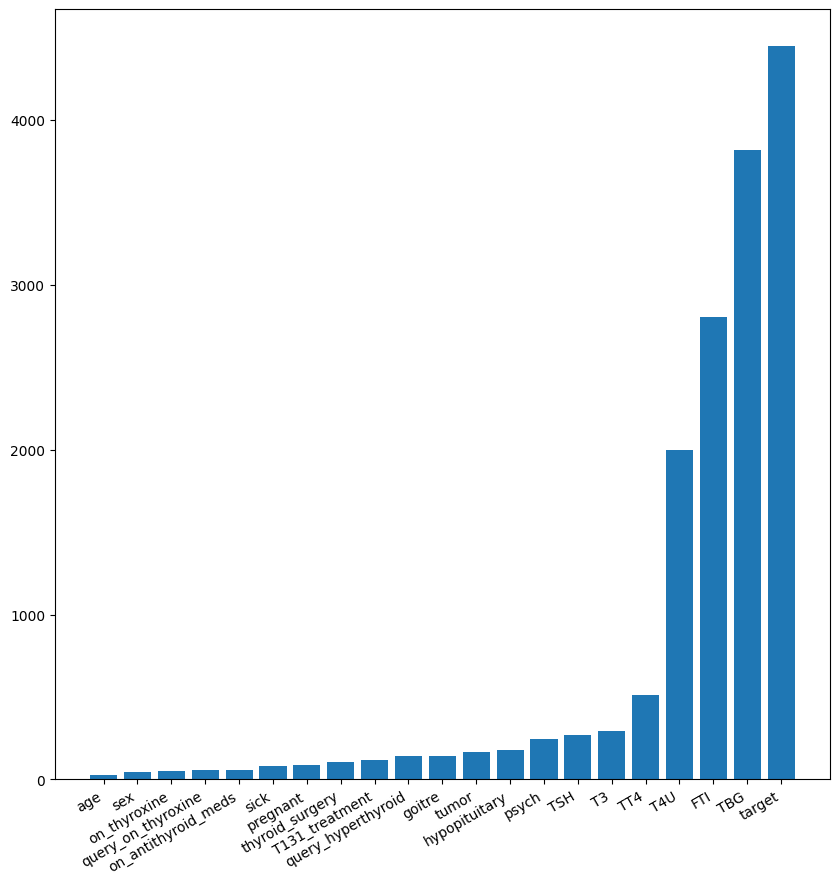

In [ ]:
# permutation feature importance with knn for regression
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
import numpy as np
from matplotlib import pyplot
# define dataset
x_bal, y_bal = make_regression(n_samples=1000, n_features=22, n_informative=5, random_state=1)
# define the model
model = KNeighborsRegressor()
# fit the model
model.fit(x_bal, y_bal)
# perform permutation importance
results = permutation_importance(model, x_bal, y_bal, scoring='neg_mean_squared_error')
# get importance
feature_importance=['age','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_meds','sick','pregnant','thyroid_surgery','T131_treatment','query_hyperthyroid','query_hyperthyroid','goitre','tumor','hypopituitary','psych','TSH','T3','TT4','T4U','FTI','TBG','target']
importance = results.importances_mean
importance = np.sort(importance)
# summarize feature importance
for i,v in enumerate(importance):
  i=feature_importance[i]
  print('Feature: {:<20} Score: {}'. format(i,v))
# plot feature importance
pyplot.figure(figsize=(10,10))
pyplot.bar(x=feature_importance, height = importance)
pyplot.xticks(rotation=30, ha='right')
pyplot.show()

In [ ]:
x.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
4,32.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.000000,0.0,0.0,0.00,0.0,36.0
18,63.0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,68.000000,0.0,48.0,1.02,47.0,0.0
32,41.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.050000,1.6,39.0,1.00,39.0,0.0
33,71.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.050000,0.0,126.0,1.38,91.0,0.0
39,55.0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,9.599999,2.4,136.0,1.48,92.0,0.0


In [ ]:
x_bal

array([[-0.64486261, -0.60694919, -0.07118176, ..., -0.6820815 ,
        -0.60490462,  1.62413625],
       [-0.03622003,  1.12236486, -0.29078359, ..., -0.55810706,
         0.24748688,  0.20341148],
       [ 1.17658394,  1.0305634 , -1.75936423, ...,  0.04038484,
        -0.73588529,  1.94865607],
       ...,
       [ 1.30618842,  0.14710122,  0.08864163, ..., -0.50694664,
         0.1798612 , -0.81420448],
       [-0.6961799 ,  0.3460052 , -1.58208456, ...,  0.53029775,
        -1.45217796,  0.7754693 ],
       [ 1.19596942,  0.09083978, -1.89809328, ...,  0.28862153,
        -1.1682518 , -0.86229352]])

In [ ]:
columns=['age','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_meds','sick','pregnant','thyroid_surgery','T131_treatment','query_hyperthyroid','goitre','tumor','hypopituitary','psych','TSH','T3','TT4','T4U','FTI','TBG','target','patient_id']
x_test_bal=pd.DataFrame(x_test_bal,columns=columns)
x_bal= pd.DataFrame(x_bal,columns=columns)


x_bal.pop('target')
x_bal.pop('patient_id')
x_bal=x_bal.drop(x_bal.loc[:, 'age':'query_hyperthyroid'].columns, axis=1)

x_test_bal.pop('target')
x_test_bal.pop('patient_id')
x_test_bal=x_test_bal.drop(x_test_bal.loc[:, 'age':'query_hyperthyroid'].columns, axis=1)

In [ ]:

x_bal.head()

,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
0,-0.263344,-0.970383,0.094400,-0.402630,-1.663683,1.220589,0.114703,-1.104442,0.264070,-0.682082
1,-0.251281,-0.360056,-1.402210,0.591212,0.326383,0.532064,-0.577928,0.166417,0.158883,-0.558107
2,-0.361855,-1.281444,1.164418,0.605601,1.721827,0.749161,-0.172085,-0.565012,1.360131,0.040385
3,0.813261,-1.152375,0.779849,1.018223,1.667778,1.641049,2.022576,0.407516,1.843095,-0.071011
4,1.020153,-0.703395,0.279401,0.581238,0.114784,-0.015001,0.359461,1.792613,1.152007,-0.639097


In [ ]:
x_test_bal.head()

,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
0,-0.250270,-0.050469,23.691469,-0.106326,-0.022547,-0.101326,-0.323741,-1.090896,0.908230,0.063109
1,-0.250270,-0.050469,-0.042209,-0.106326,-0.022547,-0.101326,-0.323427,-1.090896,1.023782,-0.111090
2,3.995687,-0.050469,-0.042209,-0.106326,-0.022547,-0.101326,-0.326094,2.164095,1.948200,-0.778855
3,-0.250270,-0.050469,-0.042209,-0.106326,-0.022547,-0.101326,-0.276357,-0.635197,-0.391733,-0.169157
4,-0.250270,-0.050469,-0.042209,-0.106326,-0.022547,-0.101326,1.336585,-0.439898,-1.113935,-0.459489


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2223 entries, 4 to 9169
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  2223 non-null   int64  
 1   sex                  2140 non-null   object 
 2   on_thyroxine         2223 non-null   object 
 3   query_on_thyroxine   2223 non-null   object 
 4   on_antithyroid_meds  2223 non-null   object 
 5   sick                 2223 non-null   object 
 6   pregnant             2223 non-null   object 
 7   thyroid_surgery      2223 non-null   object 
 8   I131_treatment       2223 non-null   object 
 9   query_hypothyroid    2223 non-null   object 
 10  query_hyperthyroid   2223 non-null   object 
 11  lithium              2223 non-null   object 
 12  goitre               2223 non-null   object 
 13  tumor                2223 non-null   object 
 14  hypopituitary        2223 non-null   object 
 15  psych                2223 non-null   o

<Axes: >

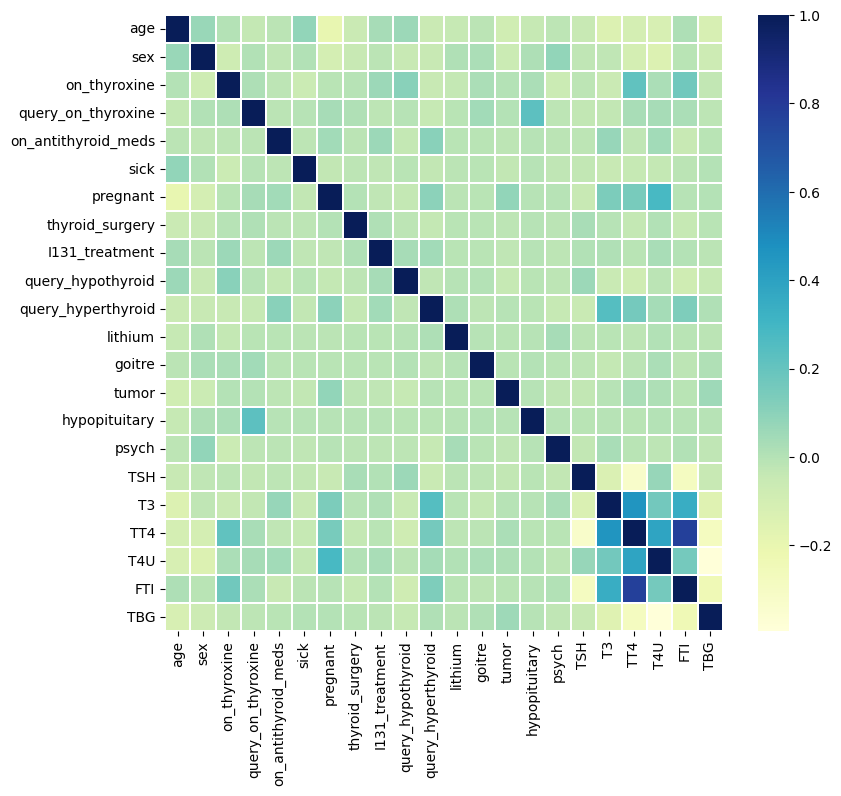

In [ ]:
#cheking correlation using Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

corrmat =x.corr()

f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [ ]:
x_bal

,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
0,-0.263344,-0.970383,0.094400,-0.402630,-1.663683,1.220589,0.114703,-1.104442,0.264070,-0.682082
1,-0.251281,-0.360056,-1.402210,0.591212,0.326383,0.532064,-0.577928,0.166417,0.158883,-0.558107
2,-0.361855,-1.281444,1.164418,0.605601,1.721827,0.749161,-0.172085,-0.565012,1.360131,0.040385
3,0.813261,-1.152375,0.779849,1.018223,1.667778,1.641049,2.022576,0.407516,1.843095,-0.071011
4,1.020153,-0.703395,0.279401,0.581238,0.114784,-0.015001,0.359461,1.792613,1.152007,-0.639097
...,...,...,...,...,...,...,...,...,...,...
995,0.910236,0.443198,-0.624842,0.364185,0.330500,0.405302,-0.114401,1.487305,-0.893118,-0.589812
996,-1.545448,0.903709,-0.019316,-2.160628,0.269397,0.303590,-0.648636,1.638962,0.520812,-1.325491
997,0.443613,1.524929,1.031118,-0.974137,1.222996,0.986078,-1.341885,-0.164995,-0.555928,-0.506947
998,-0.409531,0.388867,-1.768803,-0.057286,0.072586,0.199440,-0.438945,-0.406738,-0.049501,0.530298


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfr1 =  RandomForestClassifier().fit(x,y.values.ravel())
y_pred = rfr1.predict(x_test)

rfr1 = RandomForestClassifier()

In [ ]:
rfr1.fit(x,y.values.reshape(-1))

RandomForestClassifier()

In [ ]:
y_pred = rfr1.predict(x_test)

In [ ]:
y_pred = rfr1.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00        81
           3       1.00      1.00      1.00        83
           4       1.00      1.00      1.00       122
           5       1.00      1.00      1.00        38
           6       1.00      1.00      1.00        59
           7       1.00      1.00      1.00        58

    accuracy                           1.00       445
   macro avg       1.00      1.00      1.00       445
weighted avg       1.00      1.00      1.00       445



In [ ]:
from sklearn.metrics import accuracy_score
train_score = accuracy_score(y, rfr1.predict(x))
train_score

1.0

In [ ]:
from xgboost import XGBClassifier
xgb1 = XGBClassifier()
xgb1.fit(x,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
y_pred = xgb1.predict(x)

In [ ]:
print(classification_report(y_pred,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00       376
           3       1.00      1.00      1.00       436
           4       1.00      1.00      1.00       614
           5       1.00      1.00      1.00       147
           6       1.00      1.00      1.00       281
           7       1.00      1.00      1.00       336

    accuracy                           1.00      2223
   macro avg       1.00      1.00      1.00      2223
weighted avg       1.00      1.00      1.00      2223



In [ ]:
accuracy_score(y_pred,y_pred)

1.0

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
sv= SVC()

In [ ]:
sv.fit(x,y)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
y_pred = sv.predict(x_test)

In [ ]:
print(classification_report(y_pred,y_pred))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00        73
           3       1.00      1.00      1.00       100
           4       1.00      1.00      1.00       140
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00        85

    accuracy                           1.00       445
   macro avg       1.00      1.00      1.00       445
weighted avg       1.00      1.00      1.00       445



In [ ]:
train_score=accuracy_score(y,sv.predict(x))
train_score

0.6923076923076923

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(units = 128, activation='relu', input_shape=(10,)))

In [ ]:
model.add(Dense(units = 128, activation='relu', kernel_initializer='random_uniform'))
model.add(Dropout(0.2))
model.add(Dense(units = 256, activation='relu', kernel_initializer='random_uniform'))
model.add(Dropout(0.2))
model.add(Dense(units = 128, activation='relu', kernel_initializer='random_uniform'))

In [ ]:
model.add(Dense(units = 1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               1408      
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               33024     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dense_9 (Dense)             (None, 1)                

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#from sklearn.datasets import make_regression
#from sklearn.neighbors import KNeighborsRegressor
import tensorflow as tf
tf.config.run_functions_eagerly(True)
model.fit(x_bal,y_bal, validation_data=(x_bal,y_bal),epochs=15)

Epoch 1/15


/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


31/32 [============================>.] - ETA: 0s - loss: -119.8559 - accuracy: 0.0000e+00

/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


32/32 [==============================] - 2s 53ms/step - loss: -122.7112 - accuracy: 0.0000e+00 - val_loss: -802.0435 - val_accuracy: 0.0000e+00
Epoch 2/15
32/32 [==============================] - 3s 97ms/step - loss: -8949.3965 - accuracy: 0.0000e+00 - val_loss: -36003.5273 - val_accuracy: 0.0000e+00
Epoch 3/15
32/32 [==============================] - 4s 132ms/step - loss: -161326.6250 - accuracy: 0.0000e+00 - val_loss: -433671.6875 - val_accuracy: 0.0000e+00
Epoch 4/15
32/32 [==============================] - 3s 109ms/step - loss: -1201683.2500 - accuracy: 0.0000e+00 - val_loss: -2708230.2500 - val_accuracy: 0.0000e+00
Epoch 5/15
32/32 [==============================] - 4s 140ms/step - loss: -5930761.0000 - accuracy: 0.0000e+00 - val_loss: -11337801.0000 - val_accuracy: 0.0000e+00
Epoch 6/15
32/32 [==============================] - 5s 167ms/step - loss: -20665712.0000 - accuracy: 0.0000e+00 - val_loss: -36768664.0000 - val_accuracy: 0.0000e+00
Epoch 7/15
32/32 [=======================

In [ ]:
x.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
4,32.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.000000,0.0,0.0,0.00,0.0,36.0
18,63.0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,68.000000,0.0,48.0,1.02,47.0,0.0
32,41.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.050000,1.6,39.0,1.00,39.0,0.0
33,71.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.050000,0.0,126.0,1.38,91.0,0.0
39,55.0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,9.599999,2.4,136.0,1.48,92.0,0.0


In [ ]:
model.predict([[0,0,0,0,0.000000,0.0,0.0,1.00,0.0,40.0]])

1/1 [==============================] - 0s 37ms/step


/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


array([[1.]], dtype=float32)

In [ ]:
print(classification_report(y_pred,y_pred))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00        73
           3       1.00      1.00      1.00       100
           4       1.00      1.00      1.00       140
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00        85

    accuracy                           1.00       445
   macro avg       1.00      1.00      1.00       445
weighted avg       1.00      1.00      1.00       445



In [ ]:
train_score = accuracy_score(y,rfr1.predict(x))

In [ ]:
train_score

1.0

In [ ]:
print(classification_report(y_pred,y_pred))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00        73
           3       1.00      1.00      1.00       100
           4       1.00      1.00      1.00       140
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00        85

    accuracy                           1.00       445
   macro avg       1.00      1.00      1.00       445
weighted avg       1.00      1.00      1.00       445



In [ ]:
y_pred = sv.predict(x_test)

In [ ]:
print(classification_report(y_pred,y_pred))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00        73
           3       1.00      1.00      1.00       100
           4       1.00      1.00      1.00       140
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00        85

    accuracy                           1.00       445
   macro avg       1.00      1.00      1.00       445
weighted avg       1.00      1.00      1.00       445



In [ ]:
train_score=accuracy_score(y,sv.predict(x))
train_score

0.6923076923076923

In [ ]:
y_pred = model.predict(x_test_bal)

31/31 [==============================] - 0s 5ms/step


/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


In [ ]:
print(classification_report(y_pred,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       360
         1.0       1.00      1.00      1.00       616

    accuracy                           1.00       976
   macro avg       1.00      1.00      1.00       976
weighted avg       1.00      1.00      1.00       976



In [ ]:
accuracy_score(y_test_bal,y_pred)

0.0

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
params = {
         
          
          'C': [0.1,1,10,100,1000],
          'gamma': [1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf','sqrt','linear', 'poly', 'precomputed', 'sigmoid']
          
          
          
}

In [ ]:
random_svc =RandomizedSearchCV(sv,params, scoring='accuracy',cv=5,n_jobs=-1)

In [ ]:
sv1=SVC(kernel= 'rbf', gamma= 0.1,)

In [ ]:
sv1.fit(x,y)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma=0.1)

In [ ]:
y_pred= sv1.predict(x)

In [ ]:
print(classification_report(y_pred,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00       376
           3       1.00      1.00      1.00       436
           4       1.00      1.00      1.00       616
           5       1.00      1.00      1.00       146
           6       1.00      1.00      1.00       282
           7       1.00      1.00      1.00       335

    accuracy                           1.00      2223
   macro avg       1.00      1.00      1.00      2223
weighted avg       1.00      1.00      1.00      2223



In [ ]:
train_score= accuracy_score(y,sv1.predict(x))
train_score

0.9986504723346828

In [ ]:
import pickle
pickle.dump(sv1,open('thyroid_1_model.pkl','wb'))

In [ ]:
features = np.array([[0,0,0,0,0.000000,0.0,0.0,1.00,0.0,40.0]])

In [ ]:
pickle.dump(label_encoder,open('label_encoder.pkl','wb'))

In [ ]:
data['target'].unique()

array(['miscellaneous', 'hyperthyroid condition', 'binding protein',
       'replacement therapy', 'general health', 'hyperthyroid conditions',
       'antithyroid treatment', 'antithyroid treatmemt'], dtype=object)

In [ ]:
y['target'].unique()

array([6, 4, 2, 7, 3, 5, 1, 0])